In [1]:
import geopandas as gpd

shapefile = gpd.read_file("/kaggle/input/rzhd-hack/selected1.shp")
print(shapefile)

                    name                   geometry
0   Бекасово-Центральное  POINT (36.88475 55.40511)
1                 Перово  POINT (37.78648 55.75120)
2               Аэропорт  POINT (37.53315 55.80040)
3               Яничкино  POINT (37.85962 55.65347)
4                Красное  POINT (31.03734 54.68266)
..                   ...                        ...
64              Балашиха  POINT (37.94846 55.80955)
65        Льгов-Киевский  POINT (35.26924 51.63673)
66               Присады  POINT (37.81096 54.11987)
67               Ногинск  POINT (38.44357 55.85075)
68              Северная  POINT (37.61872 51.29396)

[69 rows x 2 columns]


In [2]:
import geopandas as gpd

# Load the shapefile
shapefile2 = gpd.read_file("/kaggle/input/rzhd-hack/all_routes_v2.shp")

# Assuming the columns for origin, destination, and distance are named 'origin', 'destination', and 'distance'
# Separating geometry from other columns
geometry = shapefile2.geometry
non_geometry = shapefile2.drop(columns='geometry')

# Aggregating non-geometry columns by summing the distances
aggregated_non_geometry = non_geometry.groupby(['origin', 'destinatio']).sum().reset_index()

# Aggregating geometry columns by grouping and applying unary_union
aggregated_geometry = shapefile2.groupby(['origin', 'destinatio'])['geometry'].apply(lambda x: x.unary_union).reset_index()

# Merging the aggregated non-geometry data with the aggregated geometry
aggregated_data = aggregated_non_geometry.merge(aggregated_geometry, on=['origin', 'destinatio'])

# Converting to GeoDataFrame
aggregated_data = gpd.GeoDataFrame(aggregated_data, geometry='geometry')

# Print the result
print(aggregated_data)


                    origin                     destinatio        id  oneway  \
0       Александро-Невская                         Рыбное  10256132       0   
1   Бекасово-Сортировочное                        Вековка  41833615      60   
2   Бекасово-Сортировочное          Люблино-Сортировочное  24567225      37   
3   Бекасово-Сортировочное                  Малоярославец  14502759      33   
4   Бекасово-Сортировочное  Москва-Сортировочная-Киевская  12674521      21   
..                     ...                            ...       ...     ...   
75                   Унеча                       Стародуб   7738604       0   
76                 Фрязево                        Ногинск   3851760      15   
77                 Щёлково               Лосиноостровская  11262971       0   
78       Ярославль-Главный               Лосиноостровская  26472587      84   
79       Ярославль-Главный                  Орехово-Зуево  20633738      66   

                                             revers

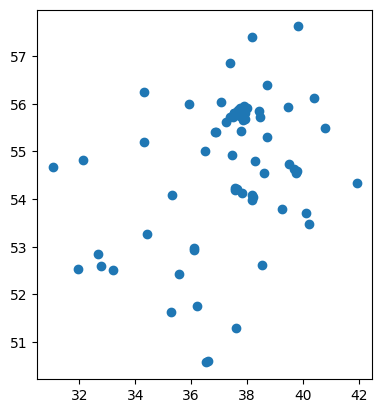

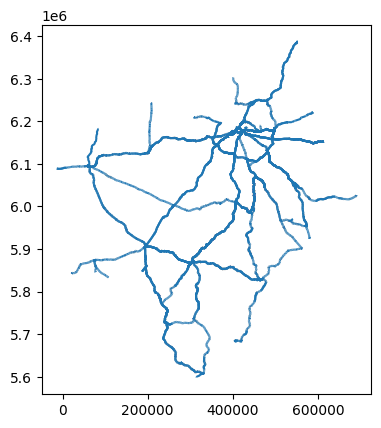

In [3]:
import matplotlib.pyplot as plt

shape2 = aggregated_data
shapefile.plot()
plt.show()

shape2.plot()
plt.show()
